<a href="https://colab.research.google.com/github/chenchenga07/Python-Data-Analysis/blob/master/Instagram%20API/Post_Caption_Word_Cloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## EDA (Exploratory Data Analysis)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd

In [3]:
ig = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Instagram Data Analysis/All_Brands_Posts.csv', header=0, index_col=0)

ig.head()
#ig[:]

,media_type,caption,comments_count,like_count,timestamp,id,brand,total_followers,total_media
0,VIDEO,Options are everything. Our new #5050VOTE boot...,7,562,2020-08-22T18:03:49+0000,17939023192381719,stuartweitzman,1417237,4121
1,VIDEO,We elected to design this limited-edition #505...,3,263,2020-08-22T13:29:32+0000,17947298341370810,stuartweitzman,1417237,4121
2,VIDEO,Your first look is here: Cast your eyes on the...,62,1313,2020-08-21T20:02:53+0000,18021788317287246,stuartweitzman,1417237,4121
3,VIDEO,Breaking news: We’re dropping our new limited-...,12,450,2020-08-21T18:16:32+0000,17878359196753326,stuartweitzman,1417237,4121
4,VIDEO,It’s limited-edition. It’s innovative. It’s im...,9,491,2020-08-21T15:01:19+0000,17863493075038184,stuartweitzman,1417237,4121


In [ ]:
ig.shape

(3900, 9)

In [ ]:
ig.empty

False

In [ ]:
ig['caption'].sample(n = 20)

861     The #GianvitoRossi Portofino 105 sandal is a s...
321     Get a glimpse into our revamped Papillon Sanda...
1599    Elevating boat shoes: the new Tod's Competitio...
45      Spotlight Stealers: Turn heads in our #IVONA p...
3351    alessandro_michele first presented his version...
3513    A self-portrait for #GucciTheRitual with her p...
3236    Keeping the dream alive of happier times under...
3713    EXCLUSIVE: neufmodeofficial X byfar_official c...
169     We see you and we hear you. When asked about t...
934     Celebrating our community. Please stay safe #M...
2352    HOT TAMALE. 🌶Admittedly, we're obsessed with o...
2767    Let’s step forward together. Since the debut o...
2198    Today we celebrate this special lady and her 5...
3806                                         🥥💦🖤 CENI 🖤💦🥥
1845    Summer is magic and stepping into it in the ne...
3817    Cutie #bellahadid spotted wearing the new BILL...
453     Keep on shining wearing our Purist Pump 105 in...
663     Make a

In [ ]:
# check whether has Null captions
sum (ig['caption'].isna())

2

In [ ]:
#fill Null captions with '', so that len() can work
values = {'caption': ''}
ig.fillna(value=values, inplace = True)

sum (ig['caption'].isna())

0

In [ ]:
#get text length
ig['length'] = ig['caption'].apply(len) 

ig.head()

,media_type,caption,comments_count,like_count,timestamp,id,brand,total_followers,total_media,length
0,VIDEO,Options are everything. Our new #5050VOTE boot...,7,562,2020-08-22T18:03:49+0000,17939023192381719,stuartweitzman,1417237,4121,299
1,VIDEO,We elected to design this limited-edition #505...,3,263,2020-08-22T13:29:32+0000,17947298341370810,stuartweitzman,1417237,4121,301
2,VIDEO,Your first look is here: Cast your eyes on the...,62,1313,2020-08-21T20:02:53+0000,18021788317287246,stuartweitzman,1417237,4121,275
3,VIDEO,Breaking news: We’re dropping our new limited-...,12,450,2020-08-21T18:16:32+0000,17878359196753326,stuartweitzman,1417237,4121,187
4,VIDEO,It’s limited-edition. It’s innovative. It’s im...,9,491,2020-08-21T15:01:19+0000,17863493075038184,stuartweitzman,1417237,4121,151


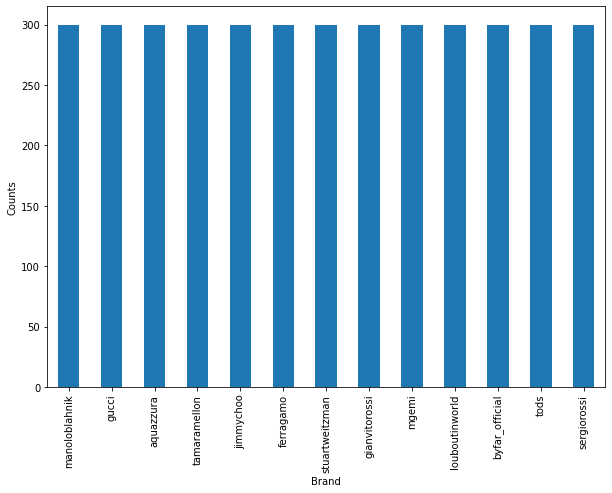

In [ ]:
#visualization of brand and post count in the dataset
import matplotlib.pyplot as cplt

cplt.figure(figsize=(10,7))

cplt.xlabel('Brand')
cplt.ylabel('Counts')

ig.brand.value_counts().plot(kind='bar')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


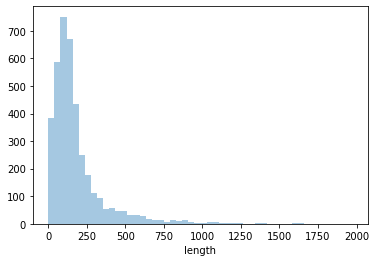

In [ ]:
import seaborn as sns

sns.distplot(ig['length'], kde=False)

In [ ]:
ig_sub = ig[['media_type','comments_count','like_count','timestamp','brand','length']]
ig_sub.head()

,media_type,comments_count,like_count,timestamp,brand,length
0,VIDEO,7,562,2020-08-22T18:03:49+0000,stuartweitzman,299
1,VIDEO,3,263,2020-08-22T13:29:32+0000,stuartweitzman,301
2,VIDEO,62,1313,2020-08-21T20:02:53+0000,stuartweitzman,275
3,VIDEO,12,450,2020-08-21T18:16:32+0000,stuartweitzman,187
4,VIDEO,9,491,2020-08-21T15:01:19+0000,stuartweitzman,151


In [ ]:
#another way to subset
#ig_sub = ig.drop(['caption','id','total_followers', 'total_media'], axis=1, inplace = False)
#ig_sub.head()

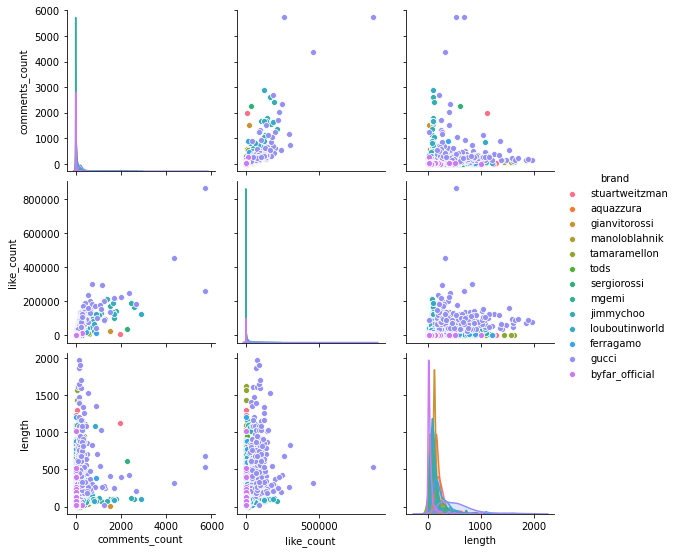

In [ ]:
#correlation between post legth & like count & comment count
sns.pairplot(ig_sub, hue='brand',palette= sns.color_palette('husl', n_colors=15))

#more detailed exploratory analysis in Tableau

##Pre-Processing

###Step 1: Contraction Mapping / Expanding Contractions

In [ ]:
!pip install contractions
import contractions

     |████████████████████████████████| 245kB 3.7MB/s 
     |████████████████████████████████| 317kB 16.5MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.0-cp36-cp36m-linux_x86_64.whl size=81709 sha256=eff8b75c84190a59c33f7ce42c7ba54f6399b70f33149b3aab1f53b780620d2c
  Stored in directory: /root/.cache/pip/wheels/0a/90/61/87a55f5b459792fbb2b7ba6b31721b06ff5cf6bde541b40994
Successfully built pyahocorasick


In [ ]:
ig_text = ig[['brand','caption']]
ig_text.sample(frac=0.0025, random_state = 12)

,brand,caption
2519,jimmychoo,The THYRA black suede and knotted crystal sand...
1889,sergiorossi,Can’t wait to write a new love story together ...
1980,sergiorossi,The #SergioRossiMan is officially back! Discov...
3558,gucci,Animals and a childlike imagination are recurr...
326,aquazzura,Our Very Positano Sandal in soft gold metallic...
1985,sergiorossi,Mr fabrizio.oriani joins us to celebrate this ...
3375,gucci,Outside in the garden with alessandro_michele ...
3393,gucci,Accidentally matching furniture and objects in...
2506,jimmychoo,Celebrate Valentines Day with the perfect frag...
1330,tamaramellon,"If you’re like us, the answer to “how are you ..."


In [ ]:
#remove contractions
ig_text['no_contract'] = ig_text['caption'].apply(lambda x: [contractions.fix(word) for word in x.split()]) 

ig_text.sample(frac=0.0025, random_state = 12)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,brand,caption,no_contract
2519,jimmychoo,The THYRA black suede and knotted crystal sand...,"[The, THYRA, black, suede, and, knotted, cryst..."
1889,sergiorossi,Can’t wait to write a new love story together ...,"[can not, wait, to, write, a, new, love, story..."
1980,sergiorossi,The #SergioRossiMan is officially back! Discov...,"[The, #SergioRossiMan, is, officially, back!, ..."
3558,gucci,Animals and a childlike imagination are recurr...,"[Animals, and, a, childlike, imagination, are,..."
326,aquazzura,Our Very Positano Sandal in soft gold metallic...,"[Our, Very, Positano, Sandal, in, soft, gold, ..."
1985,sergiorossi,Mr fabrizio.oriani joins us to celebrate this ...,"[Mr, fabrizio.oriani, joins, us, to, celebrate..."
3375,gucci,Outside in the garden with alessandro_michele ...,"[Outside, in, the, garden, with, alessandro_mi..."
3393,gucci,Accidentally matching furniture and objects in...,"[Accidentally, matching, furniture, and, objec..."
2506,jimmychoo,Celebrate Valentines Day with the perfect frag...,"[Celebrate, Valentines, Day, with, the, perfec..."
1330,tamaramellon,"If you’re like us, the answer to “how are you ...","[If, you are, like, us,, the, answer, to, “how..."


In [ ]:
#convert the lists under the "no_contract" column back into strings
ig_text['no_contract_str'] = [' '.join(map(str, x)) for x in ig_text['no_contract']] 

ig_text.sample(frac=0.0025, random_state = 12)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,brand,caption,no_contract,no_contract_str
2519,jimmychoo,The THYRA black suede and knotted crystal sand...,"[The, THYRA, black, suede, and, knotted, cryst...",The THYRA black suede and knotted crystal sand...
1889,sergiorossi,Can’t wait to write a new love story together ...,"[can not, wait, to, write, a, new, love, story...",can not wait to write a new love story togethe...
1980,sergiorossi,The #SergioRossiMan is officially back! Discov...,"[The, #SergioRossiMan, is, officially, back!, ...",The #SergioRossiMan is officially back! Discov...
3558,gucci,Animals and a childlike imagination are recurr...,"[Animals, and, a, childlike, imagination, are,...",Animals and a childlike imagination are recurr...
326,aquazzura,Our Very Positano Sandal in soft gold metallic...,"[Our, Very, Positano, Sandal, in, soft, gold, ...",Our Very Positano Sandal in soft gold metallic...
1985,sergiorossi,Mr fabrizio.oriani joins us to celebrate this ...,"[Mr, fabrizio.oriani, joins, us, to, celebrate...",Mr fabrizio.oriani joins us to celebrate this ...
3375,gucci,Outside in the garden with alessandro_michele ...,"[Outside, in, the, garden, with, alessandro_mi...",Outside in the garden with alessandro_michele ...
3393,gucci,Accidentally matching furniture and objects in...,"[Accidentally, matching, furniture, and, objec...",Accidentally matching furniture and objects in...
2506,jimmychoo,Celebrate Valentines Day with the perfect frag...,"[Celebrate, Valentines, Day, with, the, perfec...",Celebrate Valentines Day with the perfect frag...
1330,tamaramellon,"If you’re like us, the answer to “how are you ...","[If, you are, like, us,, the, answer, to, “how...","If you are like us, the answer to “how are you..."


###Step 2: Tokenization

In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
ig_text['tokenized'] = ig_text['no_contract_str'].apply(word_tokenize) #punctuations will also be tokenized 
ig_text.sample(frac=0.0025, random_state = 12)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,brand,caption,no_contract,no_contract_str,tokenized
2519,jimmychoo,The THYRA black suede and knotted crystal sand...,"[The, THYRA, black, suede, and, knotted, cryst...",The THYRA black suede and knotted crystal sand...,"[The, THYRA, black, suede, and, knotted, cryst..."
1889,sergiorossi,Can’t wait to write a new love story together ...,"[can not, wait, to, write, a, new, love, story...",can not wait to write a new love story togethe...,"[can, not, wait, to, write, a, new, love, stor..."
1980,sergiorossi,The #SergioRossiMan is officially back! Discov...,"[The, #SergioRossiMan, is, officially, back!, ...",The #SergioRossiMan is officially back! Discov...,"[The, #, SergioRossiMan, is, officially, back,..."
3558,gucci,Animals and a childlike imagination are recurr...,"[Animals, and, a, childlike, imagination, are,...",Animals and a childlike imagination are recurr...,"[Animals, and, a, childlike, imagination, are,..."
326,aquazzura,Our Very Positano Sandal in soft gold metallic...,"[Our, Very, Positano, Sandal, in, soft, gold, ...",Our Very Positano Sandal in soft gold metallic...,"[Our, Very, Positano, Sandal, in, soft, gold, ..."
1985,sergiorossi,Mr fabrizio.oriani joins us to celebrate this ...,"[Mr, fabrizio.oriani, joins, us, to, celebrate...",Mr fabrizio.oriani joins us to celebrate this ...,"[Mr, fabrizio.oriani, joins, us, to, celebrate..."
3375,gucci,Outside in the garden with alessandro_michele ...,"[Outside, in, the, garden, with, alessandro_mi...",Outside in the garden with alessandro_michele ...,"[Outside, in, the, garden, with, alessandro_mi..."
3393,gucci,Accidentally matching furniture and objects in...,"[Accidentally, matching, furniture, and, objec...",Accidentally matching furniture and objects in...,"[Accidentally, matching, furniture, and, objec..."
2506,jimmychoo,Celebrate Valentines Day with the perfect frag...,"[Celebrate, Valentines, Day, with, the, perfec...",Celebrate Valentines Day with the perfect frag...,"[Celebrate, Valentines, Day, with, the, perfec..."
1330,tamaramellon,"If you’re like us, the answer to “how are you ...","[If, you are, like, us,, the, answer, to, “how...","If you are like us, the answer to “how are you...","[If, you, are, like, us, ,, the, answer, to, “..."


###Step 3: Noise Cleaning - lowercasing, special characters

In [ ]:
ig_text['lower'] = ig_text['tokenized'].apply(lambda x: [word.lower() for word in x])
ig_text.sample(frac=0.0025, random_state = 12)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,brand,caption,no_contract,no_contract_str,tokenized,lower
2519,jimmychoo,The THYRA black suede and knotted crystal sand...,"[The, THYRA, black, suede, and, knotted, cryst...",The THYRA black suede and knotted crystal sand...,"[The, THYRA, black, suede, and, knotted, cryst...","[the, thyra, black, suede, and, knotted, cryst..."
1889,sergiorossi,Can’t wait to write a new love story together ...,"[can not, wait, to, write, a, new, love, story...",can not wait to write a new love story togethe...,"[can, not, wait, to, write, a, new, love, stor...","[can, not, wait, to, write, a, new, love, stor..."
1980,sergiorossi,The #SergioRossiMan is officially back! Discov...,"[The, #SergioRossiMan, is, officially, back!, ...",The #SergioRossiMan is officially back! Discov...,"[The, #, SergioRossiMan, is, officially, back,...","[the, #, sergiorossiman, is, officially, back,..."
3558,gucci,Animals and a childlike imagination are recurr...,"[Animals, and, a, childlike, imagination, are,...",Animals and a childlike imagination are recurr...,"[Animals, and, a, childlike, imagination, are,...","[animals, and, a, childlike, imagination, are,..."
326,aquazzura,Our Very Positano Sandal in soft gold metallic...,"[Our, Very, Positano, Sandal, in, soft, gold, ...",Our Very Positano Sandal in soft gold metallic...,"[Our, Very, Positano, Sandal, in, soft, gold, ...","[our, very, positano, sandal, in, soft, gold, ..."
1985,sergiorossi,Mr fabrizio.oriani joins us to celebrate this ...,"[Mr, fabrizio.oriani, joins, us, to, celebrate...",Mr fabrizio.oriani joins us to celebrate this ...,"[Mr, fabrizio.oriani, joins, us, to, celebrate...","[mr, fabrizio.oriani, joins, us, to, celebrate..."
3375,gucci,Outside in the garden with alessandro_michele ...,"[Outside, in, the, garden, with, alessandro_mi...",Outside in the garden with alessandro_michele ...,"[Outside, in, the, garden, with, alessandro_mi...","[outside, in, the, garden, with, alessandro_mi..."
3393,gucci,Accidentally matching furniture and objects in...,"[Accidentally, matching, furniture, and, objec...",Accidentally matching furniture and objects in...,"[Accidentally, matching, furniture, and, objec...","[accidentally, matching, furniture, and, objec..."
2506,jimmychoo,Celebrate Valentines Day with the perfect frag...,"[Celebrate, Valentines, Day, with, the, perfec...",Celebrate Valentines Day with the perfect frag...,"[Celebrate, Valentines, Day, with, the, perfec...","[celebrate, valentines, day, with, the, perfec..."
1330,tamaramellon,"If you’re like us, the answer to “how are you ...","[If, you are, like, us,, the, answer, to, “how...","If you are like us, the answer to “how are you...","[If, you, are, like, us, ,, the, answer, to, “...","[if, you, are, like, us, ,, the, answer, to, “..."


In [ ]:
import string
punc = string.punctuation
punc

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
punc2 = punc + '’“”—‘...' #add extra puctuations appears in the text found in later steps
punc2

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~’“”—‘...'

In [ ]:
#remove punctuations
ig_text['no_punc'] = ig_text['lower'].apply(lambda x: [word for word in x if word not in punc2])
ig_text.sample(frac=0.0025, random_state = 12)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,brand,caption,no_contract,no_contract_str,tokenized,lower,no_punc
2519,jimmychoo,The THYRA black suede and knotted crystal sand...,"[The, THYRA, black, suede, and, knotted, cryst...",The THYRA black suede and knotted crystal sand...,"[The, THYRA, black, suede, and, knotted, cryst...","[the, thyra, black, suede, and, knotted, cryst...","[the, thyra, black, suede, and, knotted, cryst..."
1889,sergiorossi,Can’t wait to write a new love story together ...,"[can not, wait, to, write, a, new, love, story...",can not wait to write a new love story togethe...,"[can, not, wait, to, write, a, new, love, stor...","[can, not, wait, to, write, a, new, love, stor...","[can, not, wait, to, write, a, new, love, stor..."
1980,sergiorossi,The #SergioRossiMan is officially back! Discov...,"[The, #SergioRossiMan, is, officially, back!, ...",The #SergioRossiMan is officially back! Discov...,"[The, #, SergioRossiMan, is, officially, back,...","[the, #, sergiorossiman, is, officially, back,...","[the, sergiorossiman, is, officially, back, di..."
3558,gucci,Animals and a childlike imagination are recurr...,"[Animals, and, a, childlike, imagination, are,...",Animals and a childlike imagination are recurr...,"[Animals, and, a, childlike, imagination, are,...","[animals, and, a, childlike, imagination, are,...","[animals, and, a, childlike, imagination, are,..."
326,aquazzura,Our Very Positano Sandal in soft gold metallic...,"[Our, Very, Positano, Sandal, in, soft, gold, ...",Our Very Positano Sandal in soft gold metallic...,"[Our, Very, Positano, Sandal, in, soft, gold, ...","[our, very, positano, sandal, in, soft, gold, ...","[our, very, positano, sandal, in, soft, gold, ..."
1985,sergiorossi,Mr fabrizio.oriani joins us to celebrate this ...,"[Mr, fabrizio.oriani, joins, us, to, celebrate...",Mr fabrizio.oriani joins us to celebrate this ...,"[Mr, fabrizio.oriani, joins, us, to, celebrate...","[mr, fabrizio.oriani, joins, us, to, celebrate...","[mr, fabrizio.oriani, joins, us, to, celebrate..."
3375,gucci,Outside in the garden with alessandro_michele ...,"[Outside, in, the, garden, with, alessandro_mi...",Outside in the garden with alessandro_michele ...,"[Outside, in, the, garden, with, alessandro_mi...","[outside, in, the, garden, with, alessandro_mi...","[outside, in, the, garden, with, alessandro_mi..."
3393,gucci,Accidentally matching furniture and objects in...,"[Accidentally, matching, furniture, and, objec...",Accidentally matching furniture and objects in...,"[Accidentally, matching, furniture, and, objec...","[accidentally, matching, furniture, and, objec...","[accidentally, matching, furniture, and, objec..."
2506,jimmychoo,Celebrate Valentines Day with the perfect frag...,"[Celebrate, Valentines, Day, with, the, perfec...",Celebrate Valentines Day with the perfect frag...,"[Celebrate, Valentines, Day, with, the, perfec...","[celebrate, valentines, day, with, the, perfec...","[celebrate, valentines, day, with, the, perfec..."
1330,tamaramellon,"If you’re like us, the answer to “how are you ...","[If, you are, like, us,, the, answer, to, “how...","If you are like us, the answer to “how are you...","[If, you, are, like, us, ,, the, answer, to, “...","[if, you, are, like, us, ,, the, answer, to, “...","[if, you, are, like, us, the, answer, to, how,..."


###Step 4: ‘Stop Words’ Identification

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#stop words sample
stopwords.words('english')[1:10]

['me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [ ]:
ig_text['stopwords_removed'] = ig_text['no_punc'].apply(lambda x: [word for word in x if word not in stop_words])
ig_text.sample(frac=0.0025, random_state = 12)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,brand,caption,no_contract,no_contract_str,tokenized,lower,no_punc,stopwords_removed
2519,jimmychoo,The THYRA black suede and knotted crystal sand...,"[The, THYRA, black, suede, and, knotted, cryst...",The THYRA black suede and knotted crystal sand...,"[The, THYRA, black, suede, and, knotted, cryst...","[the, thyra, black, suede, and, knotted, cryst...","[the, thyra, black, suede, and, knotted, cryst...","[thyra, black, suede, knotted, crystal, sandal..."
1889,sergiorossi,Can’t wait to write a new love story together ...,"[can not, wait, to, write, a, new, love, story...",can not wait to write a new love story togethe...,"[can, not, wait, to, write, a, new, love, stor...","[can, not, wait, to, write, a, new, love, stor...","[can, not, wait, to, write, a, new, love, stor...","[wait, write, new, love, story, together, soon..."
1980,sergiorossi,The #SergioRossiMan is officially back! Discov...,"[The, #SergioRossiMan, is, officially, back!, ...",The #SergioRossiMan is officially back! Discov...,"[The, #, SergioRossiMan, is, officially, back,...","[the, #, sergiorossiman, is, officially, back,...","[the, sergiorossiman, is, officially, back, di...","[sergiorossiman, officially, back, discover, n..."
3558,gucci,Animals and a childlike imagination are recurr...,"[Animals, and, a, childlike, imagination, are,...",Animals and a childlike imagination are recurr...,"[Animals, and, a, childlike, imagination, are,...","[animals, and, a, childlike, imagination, are,...","[animals, and, a, childlike, imagination, are,...","[animals, childlike, imagination, recurring, m..."
326,aquazzura,Our Very Positano Sandal in soft gold metallic...,"[Our, Very, Positano, Sandal, in, soft, gold, ...",Our Very Positano Sandal in soft gold metallic...,"[Our, Very, Positano, Sandal, in, soft, gold, ...","[our, very, positano, sandal, in, soft, gold, ...","[our, very, positano, sandal, in, soft, gold, ...","[positano, sandal, soft, gold, metallic, leath..."
1985,sergiorossi,Mr fabrizio.oriani joins us to celebrate this ...,"[Mr, fabrizio.oriani, joins, us, to, celebrate...",Mr fabrizio.oriani joins us to celebrate this ...,"[Mr, fabrizio.oriani, joins, us, to, celebrate...","[mr, fabrizio.oriani, joins, us, to, celebrate...","[mr, fabrizio.oriani, joins, us, to, celebrate...","[mr, fabrizio.oriani, joins, us, celebrate, ne..."
3375,gucci,Outside in the garden with alessandro_michele ...,"[Outside, in, the, garden, with, alessandro_mi...",Outside in the garden with alessandro_michele ...,"[Outside, in, the, garden, with, alessandro_mi...","[outside, in, the, garden, with, alessandro_mi...","[outside, in, the, garden, with, alessandro_mi...","[outside, garden, alessandro_michele, palazzo,..."
3393,gucci,Accidentally matching furniture and objects in...,"[Accidentally, matching, furniture, and, objec...",Accidentally matching furniture and objects in...,"[Accidentally, matching, furniture, and, objec...","[accidentally, matching, furniture, and, objec...","[accidentally, matching, furniture, and, objec...","[accidentally, matching, furniture, objects, h..."
2506,jimmychoo,Celebrate Valentines Day with the perfect frag...,"[Celebrate, Valentines, Day, with, the, perfec...",Celebrate Valentines Day with the perfect frag...,"[Celebrate, Valentines, Day, with, the, perfec...","[celebrate, valentines, day, with, the, perfec...","[celebrate, valentines, day, with, the, perfec...","[celebrate, valentines, day, perfect, fragranc..."
1330,tamaramellon,"If you’re like us, the answer to “how are you ...","[If, you are, like, us,, the, answer, to, “how...","If you are like us, the answer to “how are you...","[If, you, are, like, us, ,, the, answer, to, “...","[if, you, are, like, us, ,, the, answer, to, “...","[if, you, are, like, us, the, answer, to, how,...","[like, us, answer, feeling, time, probably, ch..."


In [ ]:
#convert the lists back into strings
ig_text['caption_cleaned'] = [' '.join(map(str, x)) for x in ig_text['stopwords_removed']] 

ig_text.sample(frac=0.0025, random_state = 12)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,brand,caption,no_contract,no_contract_str,tokenized,lower,no_punc,stopwords_removed,caption_cleaned
2519,jimmychoo,The THYRA black suede and knotted crystal sand...,"[The, THYRA, black, suede, and, knotted, cryst...",The THYRA black suede and knotted crystal sand...,"[The, THYRA, black, suede, and, knotted, cryst...","[the, thyra, black, suede, and, knotted, cryst...","[the, thyra, black, suede, and, knotted, cryst...","[thyra, black, suede, knotted, crystal, sandal...",thyra black suede knotted crystal sandals met ...
1889,sergiorossi,Can’t wait to write a new love story together ...,"[can not, wait, to, write, a, new, love, story...",can not wait to write a new love story togethe...,"[can, not, wait, to, write, a, new, love, stor...","[can, not, wait, to, write, a, new, love, stor...","[can, not, wait, to, write, a, new, love, stor...","[wait, write, new, love, story, together, soon...",wait write new love story together soon pic ni...
1980,sergiorossi,The #SergioRossiMan is officially back! Discov...,"[The, #SergioRossiMan, is, officially, back!, ...",The #SergioRossiMan is officially back! Discov...,"[The, #, SergioRossiMan, is, officially, back,...","[the, #, sergiorossiman, is, officially, back,...","[the, sergiorossiman, is, officially, back, di...","[sergiorossiman, officially, back, discover, n...",sergiorossiman officially back discover new se...
3558,gucci,Animals and a childlike imagination are recurr...,"[Animals, and, a, childlike, imagination, are,...",Animals and a childlike imagination are recurr...,"[Animals, and, a, childlike, imagination, are,...","[animals, and, a, childlike, imagination, are,...","[animals, and, a, childlike, imagination, are,...","[animals, childlike, imagination, recurring, m...",animals childlike imagination recurring motifs...
326,aquazzura,Our Very Positano Sandal in soft gold metallic...,"[Our, Very, Positano, Sandal, in, soft, gold, ...",Our Very Positano Sandal in soft gold metallic...,"[Our, Very, Positano, Sandal, in, soft, gold, ...","[our, very, positano, sandal, in, soft, gold, ...","[our, very, positano, sandal, in, soft, gold, ...","[positano, sandal, soft, gold, metallic, leath...",positano sandal soft gold metallic leather per...
1985,sergiorossi,Mr fabrizio.oriani joins us to celebrate this ...,"[Mr, fabrizio.oriani, joins, us, to, celebrate...",Mr fabrizio.oriani joins us to celebrate this ...,"[Mr, fabrizio.oriani, joins, us, to, celebrate...","[mr, fabrizio.oriani, joins, us, to, celebrate...","[mr, fabrizio.oriani, joins, us, to, celebrate...","[mr, fabrizio.oriani, joins, us, celebrate, ne...",mr fabrizio.oriani joins us celebrate new chap...
3375,gucci,Outside in the garden with alessandro_michele ...,"[Outside, in, the, garden, with, alessandro_mi...",Outside in the garden with alessandro_michele ...,"[Outside, in, the, garden, with, alessandro_mi...","[outside, in, the, garden, with, alessandro_mi...","[outside, in, the, garden, with, alessandro_mi...","[outside, garden, alessandro_michele, palazzo,...",outside garden alessandro_michele palazzo sacc...
3393,gucci,Accidentally matching furniture and objects in...,"[Accidentally, matching, furniture, and, objec...",Accidentally matching furniture and objects in...,"[Accidentally, matching, furniture, and, objec...","[accidentally, matching, furniture, and, objec...","[accidentally, matching, furniture, and, objec...","[accidentally, matching, furniture, objects, h...",accidentally matching furniture objects homes ...
2506,jimmychoo,Celebrate Valentines Day with the perfect frag...,"[Celebrate, Valentines, Day, with, the, perfec...",Celebrate Valentines Day with the perfect frag...,"[Celebrate, Valentines, Day, with, the, perfec...","[celebrate, valentines, day, with, the, perfec...","[celebrate, valentines, day, with, the, perfec...","[celebrate, valentines, day, perfect, fragranc...",celebrate valentines day perfect fragrance inc...
1330,tamaramellon,"If you’re like us, the answer to “how are you ...","[If, you a

In [ ]:
ig_text.to_csv('/content/drive/My Drive/Colab Notebooks/Instagram Data Analysis/IG_Text_Cleaned.csv', index=True)

In [4]:
#load in cleaned df if needed
#ig_text = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Instagram Data Analysis/IG_Text_Cleaned.csv', header=0, index_col=0)

#fill Null captions with '', so that len() can work
#values = {'caption_cleaned': ''}
#ig_text.fillna(value=values, inplace = True)

#sum (ig_text['caption_cleaned'].isna())

0

In [5]:
text = ig_text.caption_cleaned[0] #get 1 post caption for example
text

"options everything new 5050vote boot features debut lightweight durable lift lug sole available 'vote motif either black silver get drops exclusively instagram 8.23.2020 designed support iamavoter stuartweitzman iamavoter"

In [6]:
text2 = ig.caption[0] #get the original post caption before processing
text2

"Options are everything. Our new #5050VOTE boot, which features the debut of our lightweight and durable LIFT lug sole, is available with a 'VOTE' motif in either black or silver. Get yours when it drops exclusively on Instagram 8.23.2020. Designed in support of iamavoter. #StuartWeitzman #iamavoter"

##Word Cloud

In [7]:
# re import all packages if needed

#from google.colab import drive
#drive.mount('/content/drive')

#import pandas as pd
#import matplotlib.pyplot as cplt
#import seaborn as sns

#import nltk
#nltk.download('punkt')
#from nltk.tokenize import word_tokenize

#nltk.download('stopwords')
#from nltk.corpus import stopwords
#stop_words = set(stopwords.words('english'))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


###For 1 singel post

In [8]:
!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt

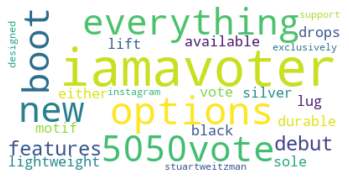

In [9]:
#word cloud for the first post caption as example
#use wordcloud builtin algorithm
wordcloud = WordCloud(background_color='white').generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

###For all brands' posts

In [10]:
#combine all posts into 1 big text
textAll = ' '.join(t for t in ig_text.caption_cleaned) 
print ('There are {} words in the combination of all review.'.format(len(textAll)))

There are 556908 words in the combination of all review.


In [11]:
import os
import string
from os import path

#include Emoji in word cloud
normal_word = r"(?:\w[\w']+)"
ascii_art = r"(?:[{punctuation}][{punctuation}]+)".format(punctuation=string.punctuation)

emoji = r"(?:[^\s])(?<![\w{ascii_printable}])".format(ascii_printable=string.printable)
regexp = r"{normal_word}|{ascii_art}|{emoji}".format(normal_word=normal_word, ascii_art=ascii_art,emoji=emoji)

font_path = path.join('/content/drive/My Drive/Colab Notebooks/Instagram Data Analysis/', 'symbola', 'Symbola.ttf')

#https://amueller.github.io/word_cloud/auto_examples/emoji.html

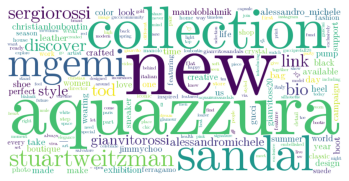

In [12]:
#approach 1: use wordcloud builtin algorithm
wordcloud = WordCloud(background_color='white',width=800, height=400, collocations = False, 
                      font_path=font_path, regexp=regexp).generate(textAll) 
                      #collocations = F: don't do bigram
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [13]:
#approach 2: pull word frequency dictionary, then use it to polt word cloud - will only use this approach in following steps

#checking word's frequency (exclude stop words)
from collections import Counter

def word_frequency_dict(text,top_n = 30):
    stop = set(stopwords.words('english')) 
    stop.add('\'s') #exclude 's
    #delete "remove stop word" part here will not affect result, because we already did it in previous steps
    
    new = text.str.split() #column of lists
    new = new.values.tolist() #list of lists
    corpus = [word for i in new for word in i  if word not in stop] #to one list of words

    counter = Counter(corpus)
    most = counter.most_common() #list of tuples(word,count) desc

    result = {}
    for word,count in most[:top_n]:
      result[word] = count
            
    return result #get dict of word:frequency to use in wordcloud plot

In [14]:
allBrand_30 = word_frequency_dict(ig_text['caption_cleaned'])
allBrand_200 = word_frequency_dict(ig_text['caption_cleaned'],200)

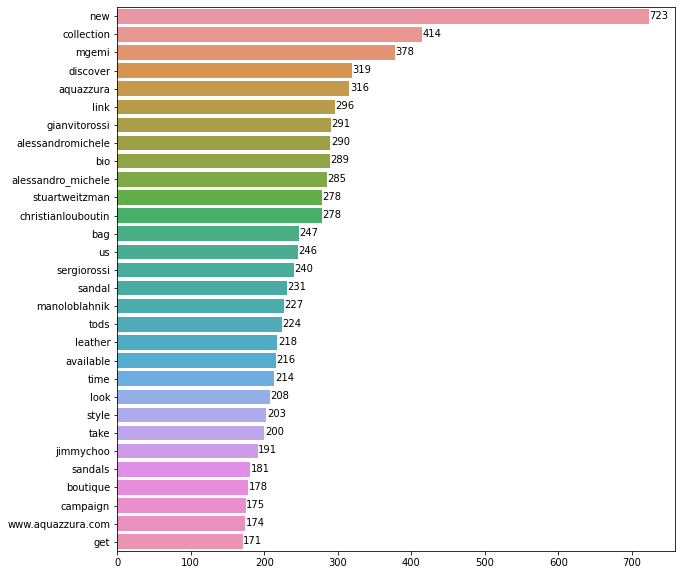

In [15]:
#plot out word's frequency (exclude stop words)

import matplotlib.pyplot as plt
import seaborn as sns

def plot_word_frequency(wf):

    fig = plt.figure(figsize=(10,10))
    splot = sns.barplot(x=list(wf.values()),y=list(wf.keys()))

    for p in splot.patches: #add annotations using matplotlib.axes.Axes.annotate
      splot.annotate(format(p.get_width(), '.0f'), #round to integer
                   (p.get_width(), p.get_y() + p.get_height()),  #adjust annotate position
                   ha = 'center', va = 'center', 
                   xytext = (10, 8), #the position (x, y) to place the text at
                   textcoords = 'offset points')
      
    return fig  
    
figImage = plot_word_frequency(allBrand_30)
figImage.savefig('/content/drive/My Drive/Colab Notebooks/Instagram Data Analysis/Export Images/allBrand_word_frequency.png', bbox_inches = 'tight' )


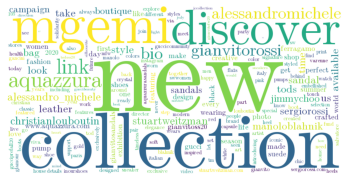

In [16]:
#use the word frequency dict created by ourselves to plot wordcloud

wordcloud2 = WordCloud(background_color='white',width=800, height=400,collocations = False,
                       font_path=font_path, regexp=regexp, random_state = 10).generate_from_frequencies(allBrand_200) 

plt.imshow(wordcloud2)
plt.axis('off')
plt.show()

In [17]:
wordcloud2.to_file('/content/drive/My Drive/Colab Notebooks/Instagram Data Analysis/Export Images/allBrand_wordcloud.png')

###For all SW's posts

In [18]:
#pull post captions for stuartweitzman as example
ig_text[ig_text['brand']== 'stuartweitzman'].caption_cleaned

0      options everything new 5050vote boot features ...
1      elected design limited-edition 5050vote boot s...
2      first look cast eyes limited-edition 5050vote ...
3      breaking news dropping new limited-edition 505...
4      limited-edition innovative impactful something...
                             ...                        
295    ww ❤️ sw wonderwoman star galgadot coordinates...
296    spotted prima ballerina mistycopeland dancing ...
297    holiday mode step inside hudson yards boutique...
298    times square ready new year visit 45th street ...
299    swholiday campaign step inside part iii streng...
Name: caption_cleaned, Length: 300, dtype: object

In [19]:
sw_30 = word_frequency_dict(ig_text[ig_text['brand']== 'stuartweitzman'].caption_cleaned)

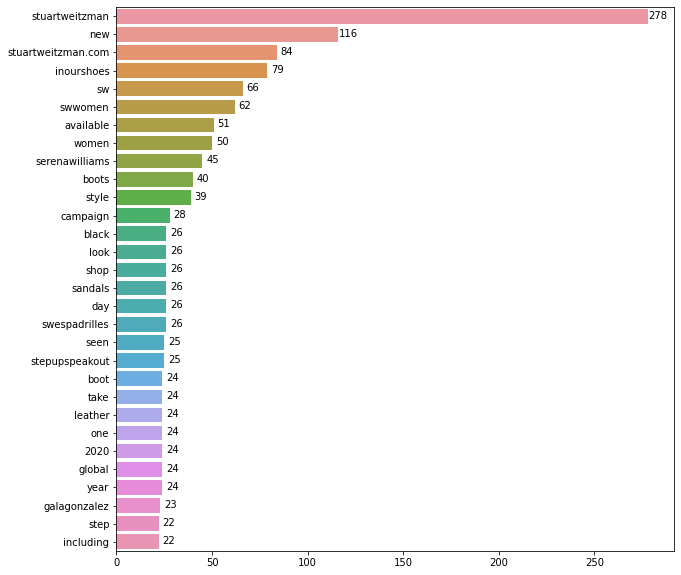

In [22]:
figImage = plot_word_frequency(sw_30)

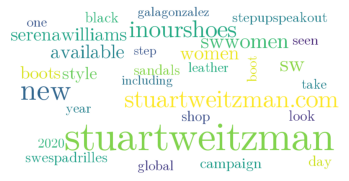

In [21]:
wordcloud3 = WordCloud(background_color='white',width=800, height=400, collocations = False,
                       font_path=font_path, regexp=regexp, random_state = 10).generate_from_frequencies(sw_30)
                       
plt.imshow(wordcloud3)
plt.axis('off')
plt.show()

###For each brands' posts

In [23]:
allb = ig_text.brand.unique()
allb

array(['stuartweitzman', 'aquazzura', 'gianvitorossi', 'manoloblahnik',
       'tamaramellon', 'tods', 'sergiorossi', 'mgemi', 'jimmychoo',
       'louboutinworld', 'ferragamo', 'gucci', 'byfar_official'],
      dtype=object)

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128152 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 10024 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128152 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 10024 missing from current font.
  font.set_text(s, 0, flags=flags)


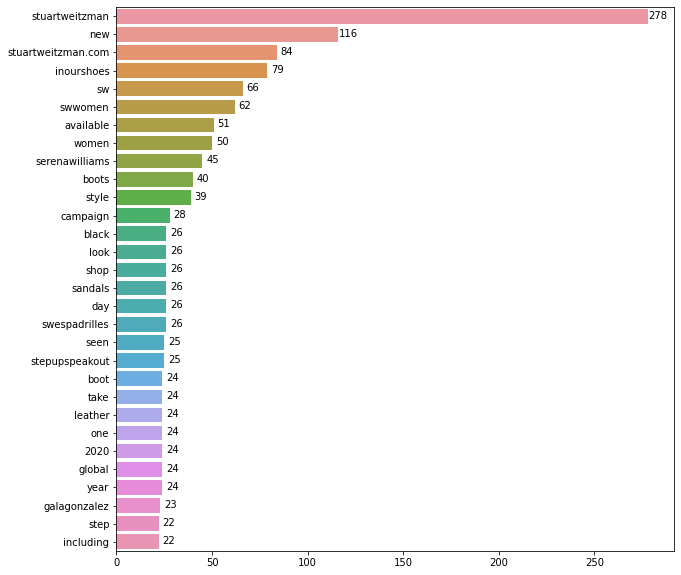

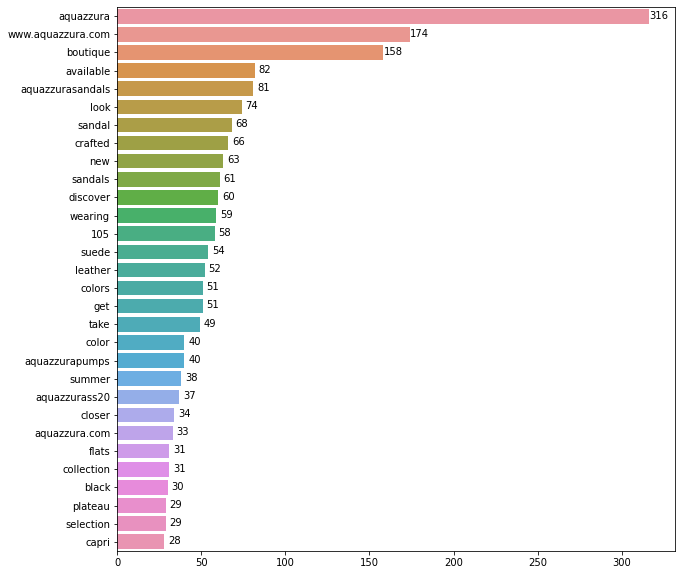

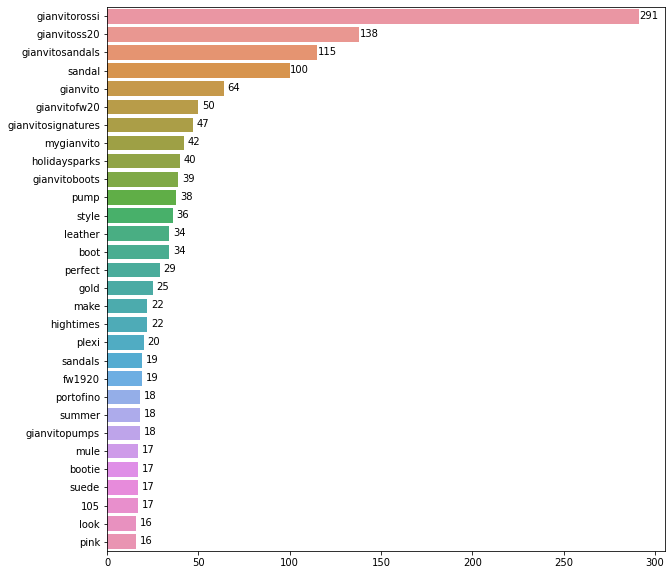

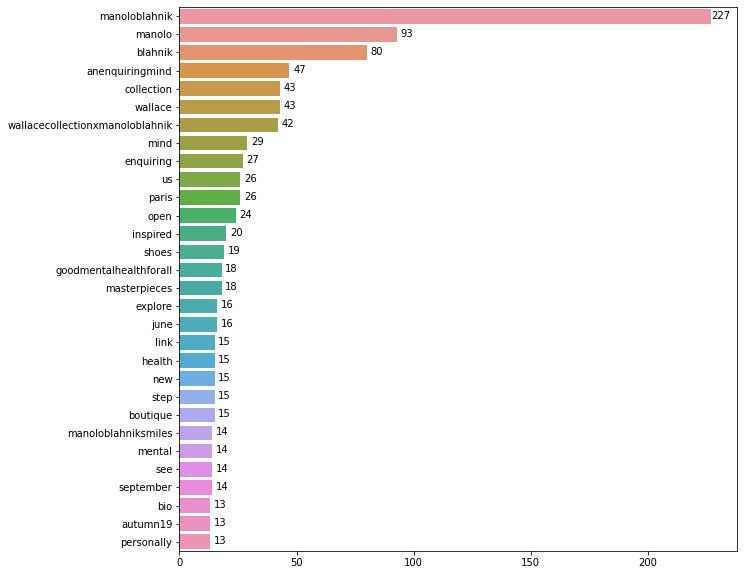

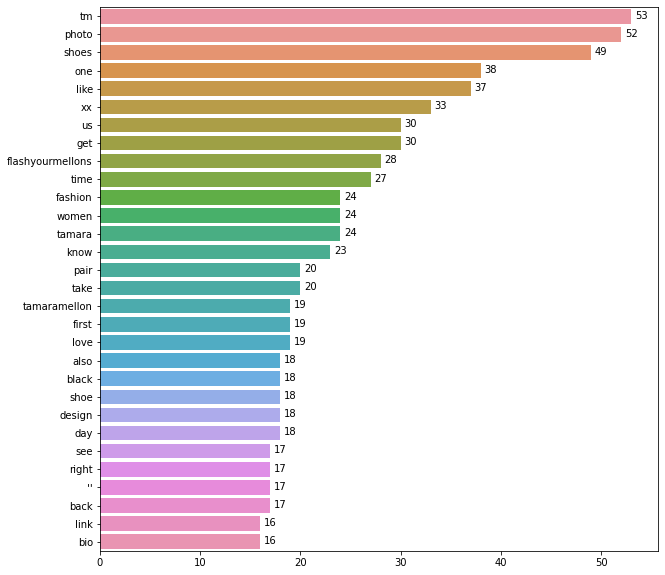

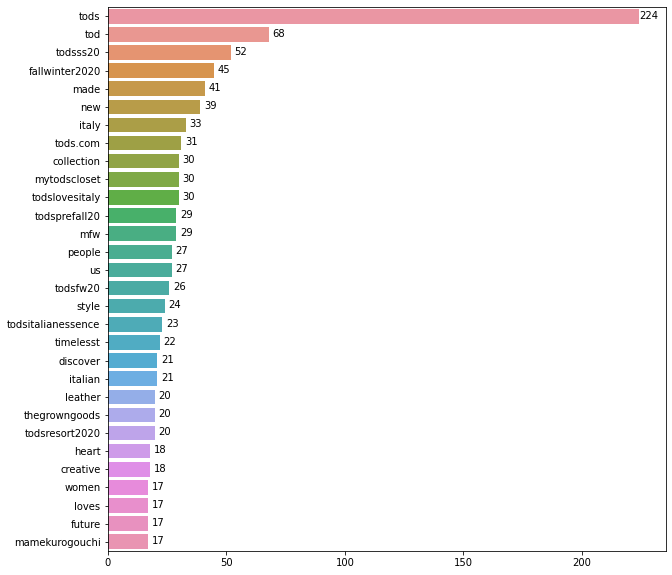

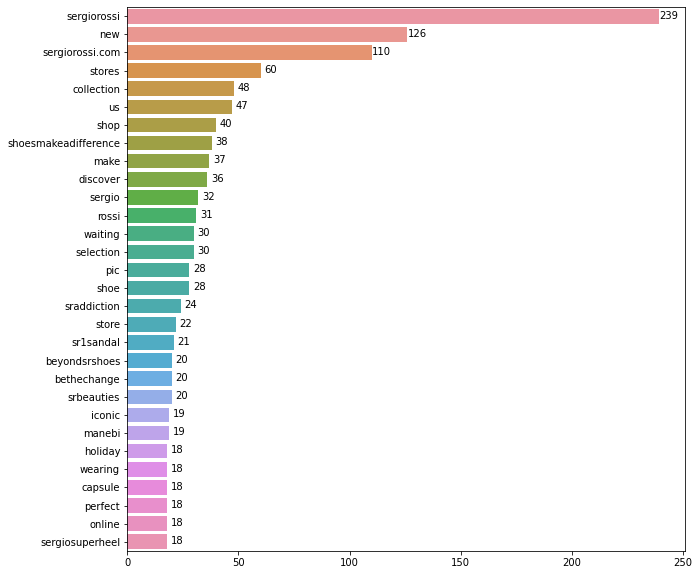

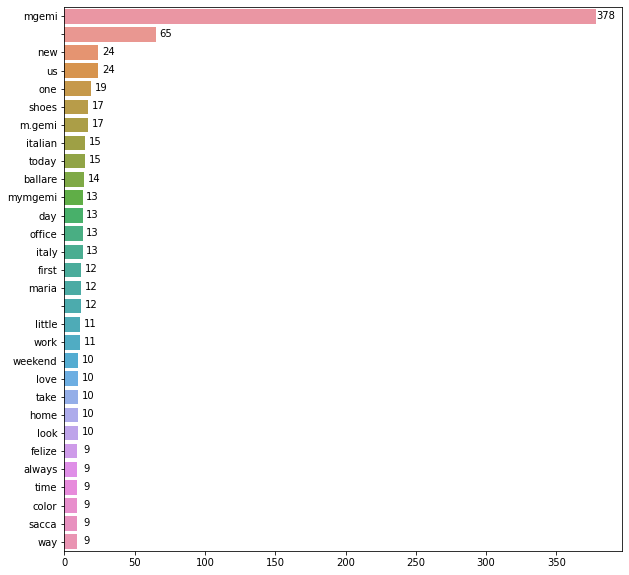

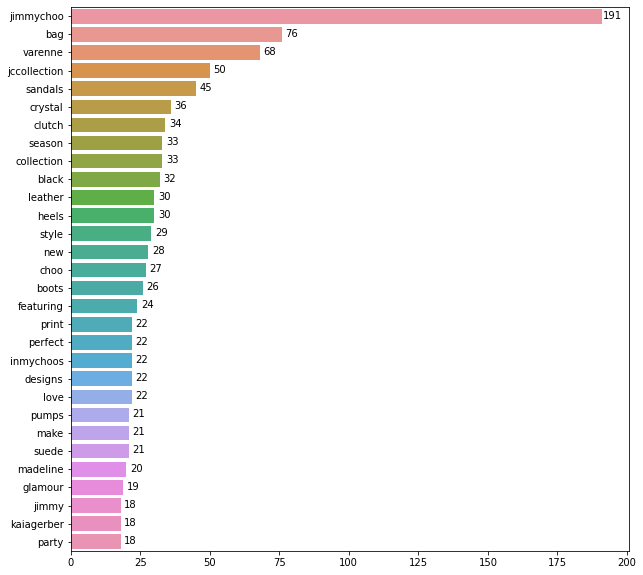

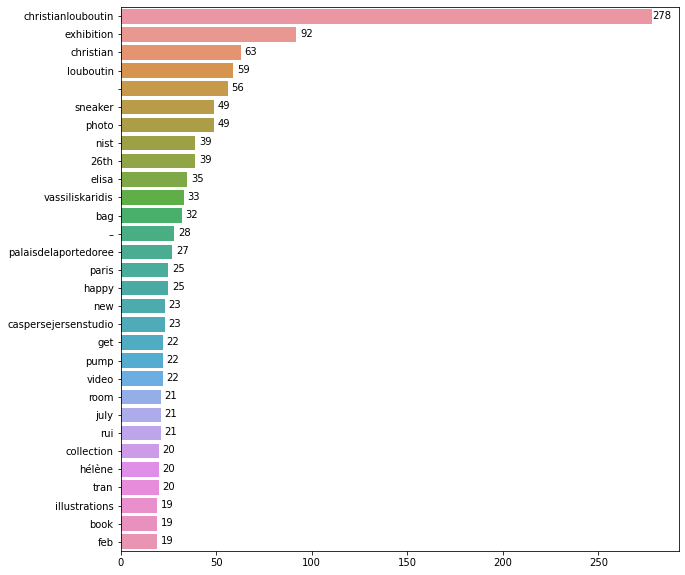

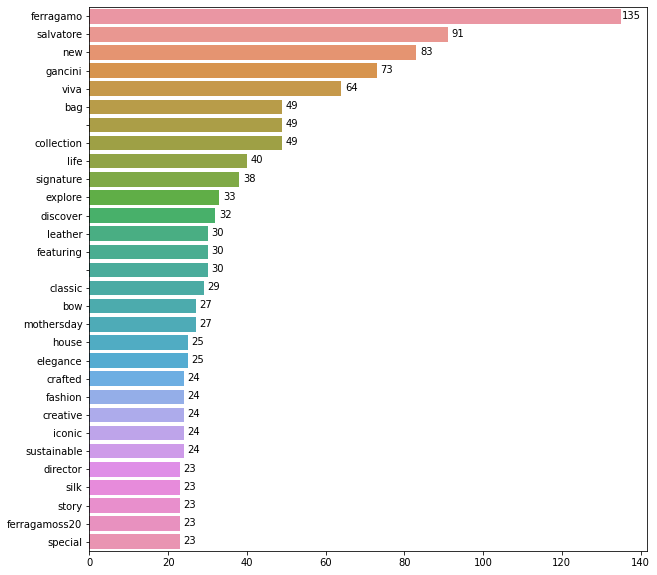

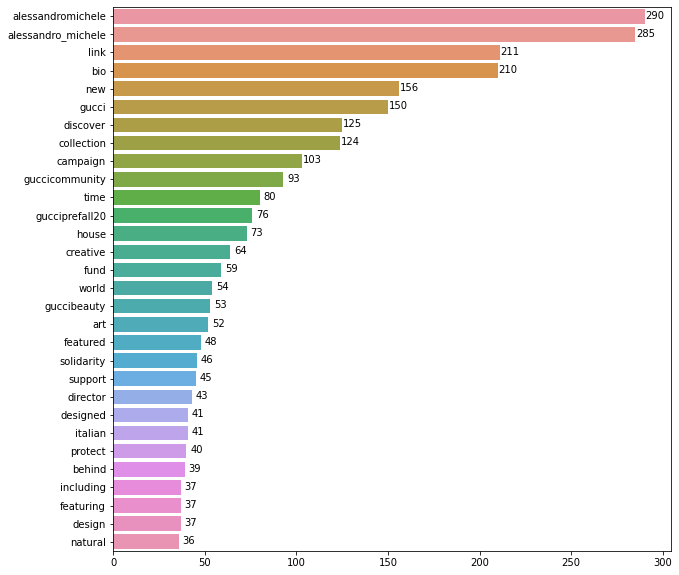

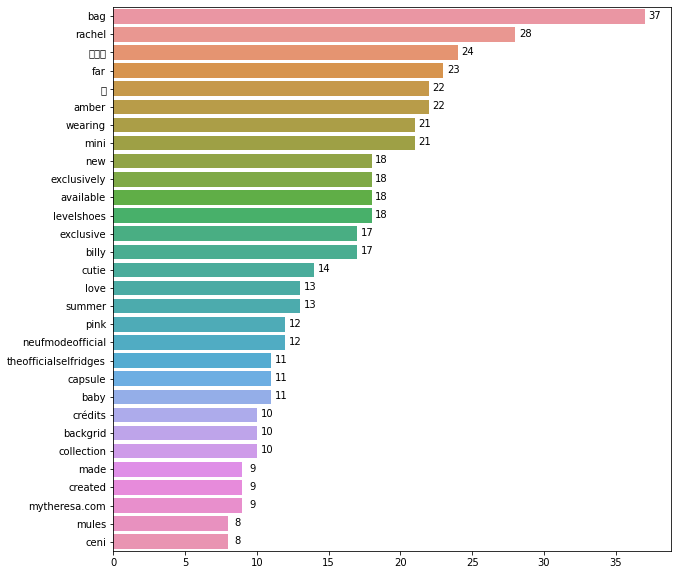

In [24]:
for b in allb:
  result = word_frequency_dict(ig_text[ig_text['brand']== b].caption_cleaned)
  figImage = plot_word_frequency(result)
  
  figImage.savefig(f'/content/drive/My Drive/Colab Notebooks/Instagram Data Analysis/Export Images/{b}_word_frequency.png', bbox_inches = 'tight' )

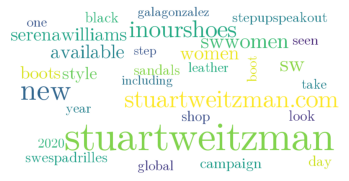

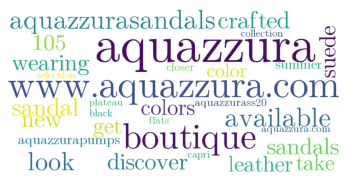

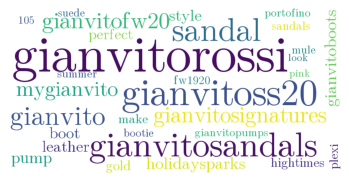

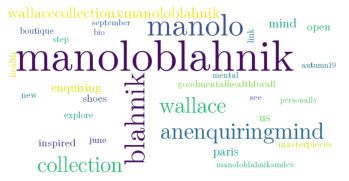

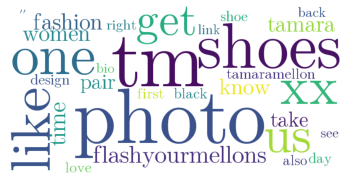

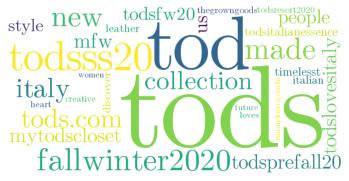

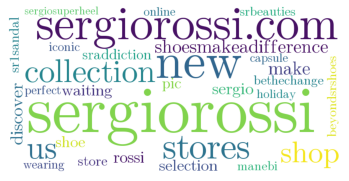

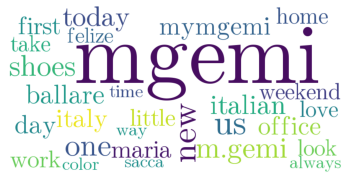

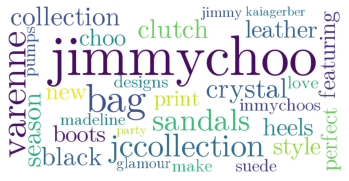

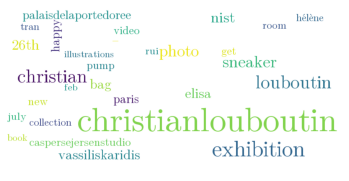

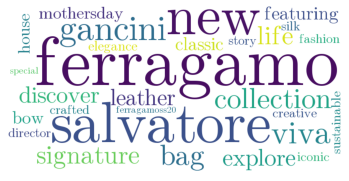

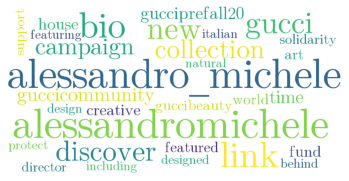

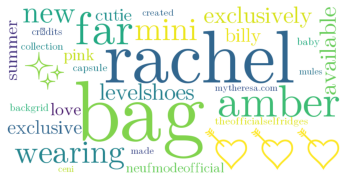

In [25]:
for b in allb:
  result = word_frequency_dict(ig_text[ig_text['brand']== b].caption_cleaned)
  #plot_word_frequency(result)

  wordcloud = WordCloud(background_color='white',width=800, height=400, collocations = False,
                        font_path=font_path, regexp=regexp, random_state = 10).generate_from_frequencies(result)

  plt.imshow(wordcloud)
  plt.axis('off')
  plt.show()
  
  wordcloud.to_file(f'/content/drive/My Drive/Colab Notebooks/Instagram Data Analysis/Export Images/{b}_wordcloud.png')